# Chapter 4: Exercise 16

We develop models **(Logistic Regression, LDA, QDA, Naive Bayes, KNN)** to predict crime rate in Boston suburbs. In particular we are predicting whether a neighborhood will have crime rate above or below the median Boston crime rate. First we identify variables correlated with response variable, and then experiment with different subsets of predictors to choose the best model.

Boston Dataset: 506 observations on the following 13 variables.

- **crim:** per capita crime rate by town
- **zn:** proportion of residential land zoned for lots over 25,000 sq.ft.
- **indus:** proportion of non-retail business acres per town
- **chas:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **nox:** nitrogen oxides concentration (parts per 10 million)
- **rm:** average number of rooms per dwelling
- **age:** proportion of owner-occupied units built prior to 1940
- **dis:** weighted mean of distances to five Boston employment centers
- **rad:** index of accessibility to radial highways
- **tax:** full-value property-tax rate per &dollar;10,000
- **ptratio:** pupil-teacher ratio by town
- **lstat:** lower status of the population (percent)
- **medv:** median value of owner-occupied homes in &dollar;1000s

**Import packages**

In [30]:
import numpy as np
# import pandas as pd
from ISLP import load_data
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import \
    (LinearDiscriminantAnalysis as LDA,
     QuadraticDiscriminantAnalysis as QDA)
from ISLP import confusion_table
# from ISLP.models import ModelSpec as MS
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

### Create binary variable crim01
crim01 = 1 if crim > median(crim), 0 otherwise

In [3]:
Boston = load_data('Boston')
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [4]:
crim01 = [int(b) for b in Boston['crim'] > Boston['crim'].median()]

In [5]:
Boston['crim01'] = crim01

### Explore graphically the association between crim01 and other variables

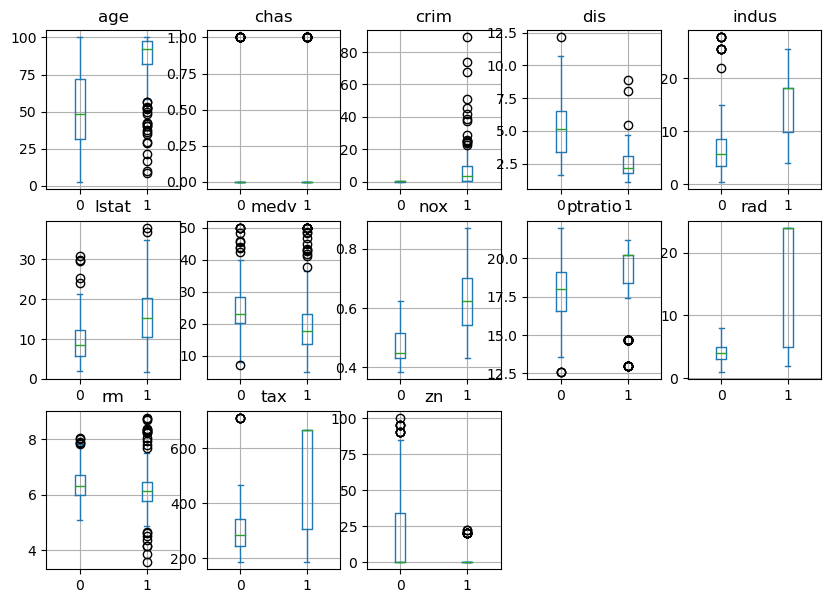

In [9]:
Boston.plot.box(by='crim01', layout=(3,5), figsize=(10,7), grid=True);

In [8]:
Boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,crim01
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305,0.409395
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445,-0.436151
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725,0.603260
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260,0.070097
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321,0.723235
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360,-0.156372
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955,0.613940
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929,-0.616342
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626,0.619786
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536,0.608741


The variables that seem most likely to be useful in predicting crim01 are:

- nox
- age
- indus
- dis
- rad
- tax

### Defining functions for pipeline

In [28]:
# Logistic Regression
def logisticRegression(X_train, y_train, X_test, L_test):
    glm_train = sm.GLM(y_train,
                   X_train,
                   family=sm.families.Binomial())
    results = glm_train.fit()
    probs = results.predict(exog=X_test)
    labels = np.array([0]*len(X_test))
    labels[probs>0.5] = 1
    return confusion_table(labels, L_test), np.mean(labels == L_test)

# lDA
def lda(X_train, L_train, X_test, L_test):
    lda = LDA(store_covariance=True)
    lda.fit(X_train, L_train)
    lda_pred = lda.predict(X_test)
    return confusion_table(lda_pred, L_test), np.mean(lda_pred == L_test)

# QDA
def qda(X_train, L_train, X_test, L_test):
    qda = QDA(store_covariance=True)
    qda.fit(X_train, L_train)
    qda_pred = qda.predict(X_test)
    return confusion_table(qda_pred, L_test), np.mean(qda_pred == L_test)

# Naive Bayes
def nb(X_train, L_train, X_test, L_test):
    NB = GaussianNB()
    NB.fit(X_train, L_train)
    nb_labels = NB.predict(X_test)
    return confusion_table(nb_labels, L_test), np.mean(nb_labels == L_test)

# KNN 
def knn(X_train, L_train, X_test, L_test, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, L_train)
    knn_pred = knn.predict(X_test)
    return confusion_table(knn_pred, L_test), np.mean(knn_pred == L_test)

In [86]:
(X_train,
 X_test,
 y_train,
 y_test) = train_test_split(Boston.drop(columns=['crim01', 'crim']),
                            Boston[['crim01']],
                            test_size=.25,
                            random_state=93)

In [25]:
def compareModels(X_train, X_test, y_train, y_test):    

    data = {}

    # Logistic Regression
    logr_train = X_train.copy()
    logr_test = X_test.copy()
    logr_train['intercept'] = 1
    logr_test['intercept'] = 1
    
    logConfusionTable, accuracy = logisticRegression(logr_train, y_train, logr_test, y_test)
    data['Logistic Regression']= accuracy

    # LDA
    confusionTable, accuracy = lda(X_train, y_train, X_test, y_test)
    data['LDA']= accuracy

    # QDA
    confusionTable, accuracy = qda(X_train, y_train, X_test, y_test)
    data['QDA']= accuracy

    # Naive Bayes
    confusionTable, accuracy = nb(X_train, y_train, X_test, y_test)
    data['Naive Bayes']= accuracy

    # KNN
    confusionTable, accuracy = knn(X_train, y_train, X_test, y_test, 1)
    data['KNN K=1']= accuracy

    confusionTable, accuracy = knn(X_train, y_train, X_test, y_test, 2)
    data['KNN K=2']= accuracy

    confusionTable, accuracy = knn(X_train, y_train, X_test, y_test, 5)
    data['KNN K=5']= accuracy

    confusionTable, accuracy = knn(X_train, y_train, X_test, y_test, 10)
    data['KNN K=10']= accuracy

    confusionTable, accuracy = knn(X_train, y_train, X_test, y_test, 15)
    data['KNN K=15']= accuracy

    confusionTable, accuracy = knn(X_train, y_train, X_test, y_test, 20)
    data['KNN K=20']= accuracy

    confusionTable, accuracy = knn(X_train, y_train, X_test, y_test, 25)
    data['KNN K=25']= accuracy

    # Creating bar graph
    acc = list(data.keys())
    model = list(data.values())
  
    fig = plt.figure(figsize = (15, 6))
    plt.bar(acc, model, width = 0.4)
 
    plt.xlabel("Model")
    plt.ylabel("Accuracy")
    plt.title("Overall Fraction of Correct Predictions")
    plt.show()

    print(data)

    print('\n Max:',max(zip(data.values(), data.keys())), '\n\n', logConfusionTable)

### Explore models using different predictors

#### Using All Variables

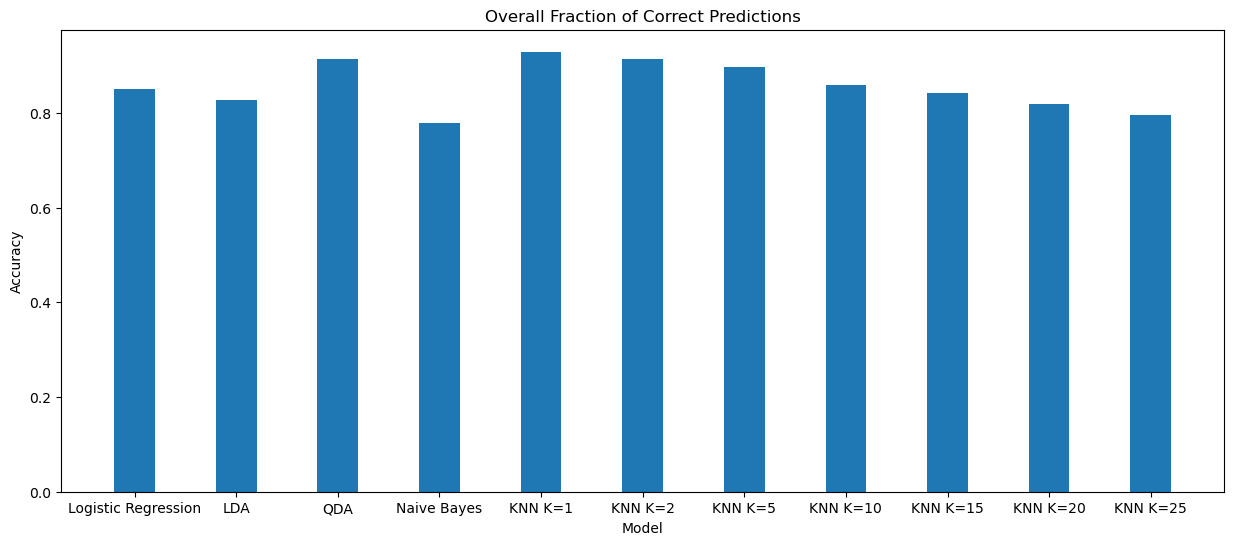

{'Logistic Regression': 0.8503937007874016, 'LDA': 0.8267716535433071, 'QDA': 0.9133858267716536, 'Naive Bayes': 0.7795275590551181, 'KNN K=1': 0.9291338582677166, 'KNN K=2': 0.9133858267716536, 'KNN K=5': 0.8976377952755905, 'KNN K=10': 0.8582677165354331, 'KNN K=15': 0.84251968503937, 'KNN K=20': 0.8188976377952756, 'KNN K=25': 0.7952755905511811}

 Max: (0.9291338582677166, 'KNN K=1') 

 Truth       0   1
Predicted        
0          57  11
1           8  51


In [87]:
compareModels(X_train, X_test, np.ravel(y_train), np.ravel(y_test))

#### Using nox, age, indus, dis, rad, tax

In [88]:
vars = ['nox', 'age', 'indus', 'dis', 'rad', 'tax']

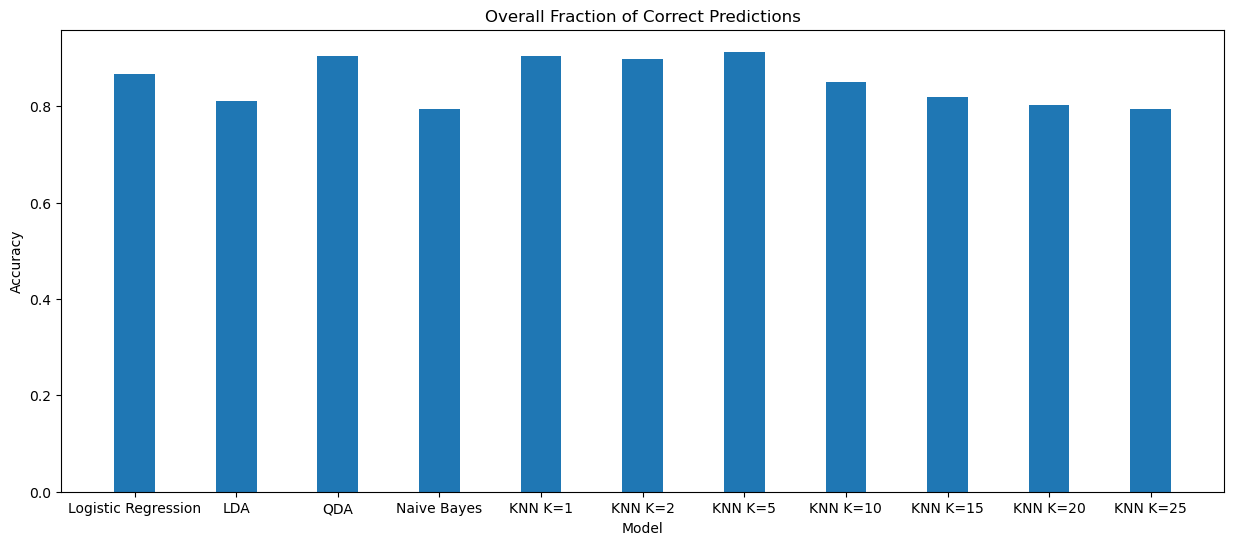

{'Logistic Regression': 0.8661417322834646, 'LDA': 0.8110236220472441, 'QDA': 0.905511811023622, 'Naive Bayes': 0.7952755905511811, 'KNN K=1': 0.905511811023622, 'KNN K=2': 0.8976377952755905, 'KNN K=5': 0.9133858267716536, 'KNN K=10': 0.8503937007874016, 'KNN K=15': 0.8188976377952756, 'KNN K=20': 0.8031496062992126, 'KNN K=25': 0.7952755905511811}

 Max: (0.9133858267716536, 'KNN K=5') 

 Truth       0   1
Predicted        
0          58  10
1           7  52


In [89]:
compareModels(X_train[vars], X_test[vars], np.ravel(y_train), np.ravel(y_test))

#### Using nox, rad

In [90]:
vars = ['nox', 'rad']

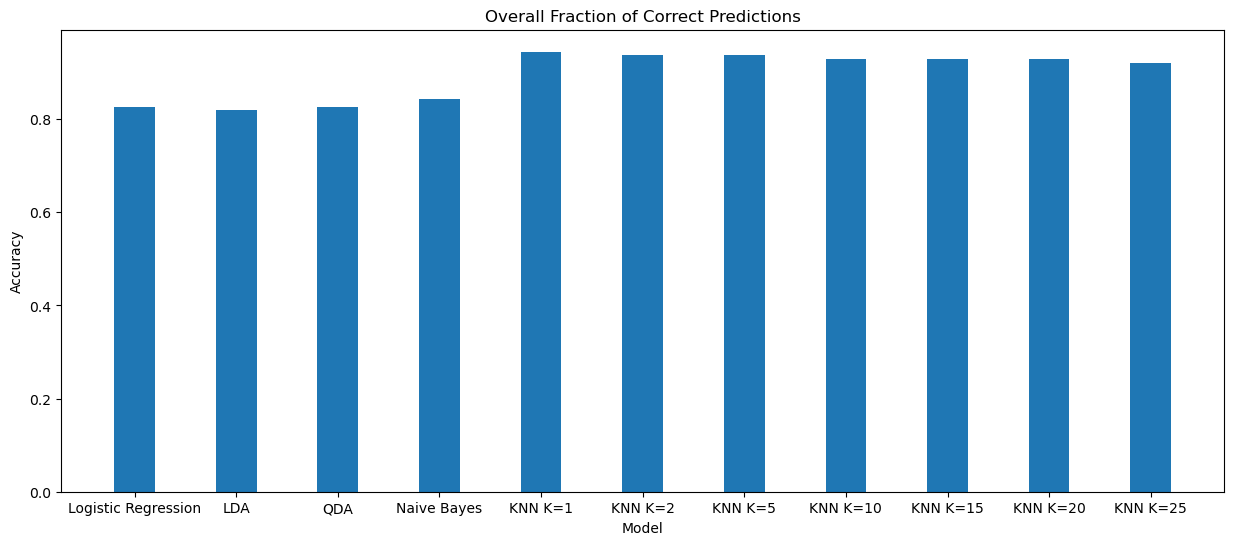

{'Logistic Regression': 0.8267716535433071, 'LDA': 0.8188976377952756, 'QDA': 0.8267716535433071, 'Naive Bayes': 0.84251968503937, 'KNN K=1': 0.9448818897637795, 'KNN K=2': 0.937007874015748, 'KNN K=5': 0.937007874015748, 'KNN K=10': 0.9291338582677166, 'KNN K=15': 0.9291338582677166, 'KNN K=20': 0.9291338582677166, 'KNN K=25': 0.9212598425196851}

 Max: (0.9448818897637795, 'KNN K=1') 

 Truth       0   1
Predicted        
0          57  14
1           8  48


In [91]:
compareModels(X_train[vars], X_test[vars], np.ravel(y_train), np.ravel(y_test))

#### Using nox, ptratio

In [92]:
vars = ['nox', 'ptratio']

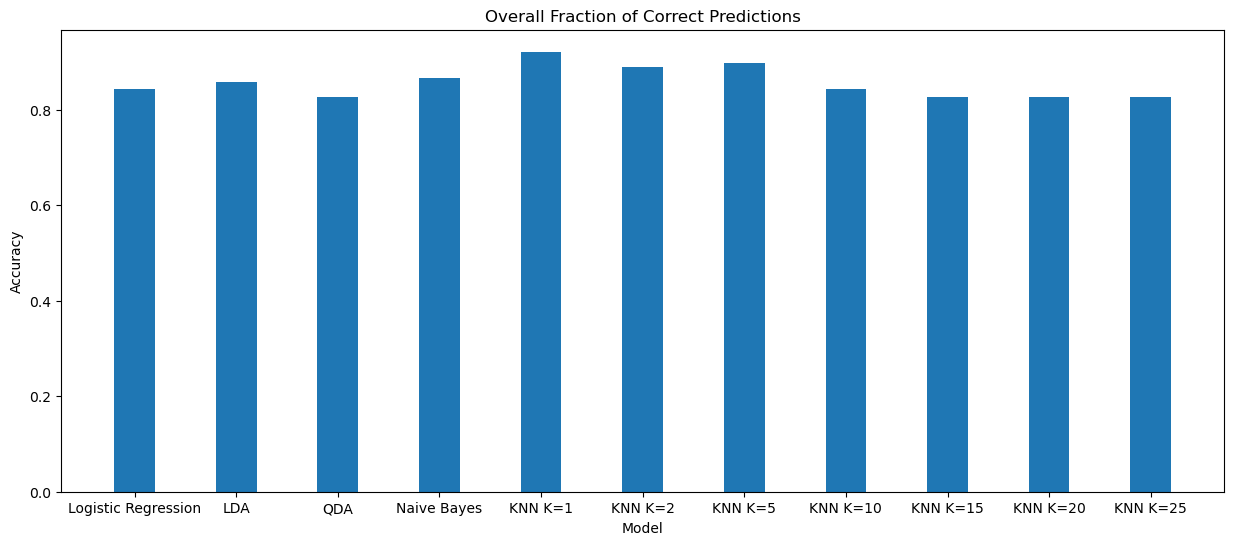

{'Logistic Regression': 0.84251968503937, 'LDA': 0.8582677165354331, 'QDA': 0.8267716535433071, 'Naive Bayes': 0.8661417322834646, 'KNN K=1': 0.9212598425196851, 'KNN K=2': 0.889763779527559, 'KNN K=5': 0.8976377952755905, 'KNN K=10': 0.84251968503937, 'KNN K=15': 0.8267716535433071, 'KNN K=20': 0.8267716535433071, 'KNN K=25': 0.8267716535433071}

 Max: (0.9212598425196851, 'KNN K=1') 

 Truth       0   1
Predicted        
0          57  12
1           8  50


In [93]:
compareModels(X_train[vars], X_test[vars], np.ravel(y_train), np.ravel(y_test))

#### Using rad, ptratio

In [94]:
vars = ['rad', 'ptratio']

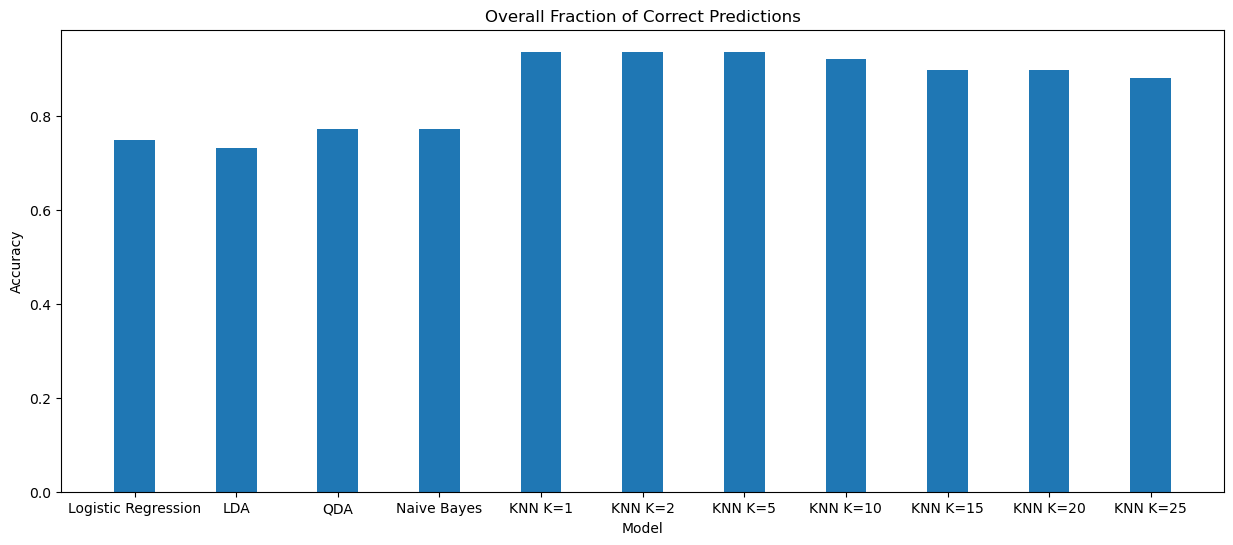

{'Logistic Regression': 0.7480314960629921, 'LDA': 0.7322834645669292, 'QDA': 0.7716535433070866, 'Naive Bayes': 0.7716535433070866, 'KNN K=1': 0.937007874015748, 'KNN K=2': 0.937007874015748, 'KNN K=5': 0.937007874015748, 'KNN K=10': 0.9212598425196851, 'KNN K=15': 0.8976377952755905, 'KNN K=20': 0.8976377952755905, 'KNN K=25': 0.8818897637795275}

 Max: (0.937007874015748, 'KNN K=5') 

 Truth       0   1
Predicted        
0          61  28
1           4  34


In [95]:
compareModels(X_train[vars], X_test[vars], np.ravel(y_train), np.ravel(y_test))

#### Using nox

In [96]:
vars = ['nox']

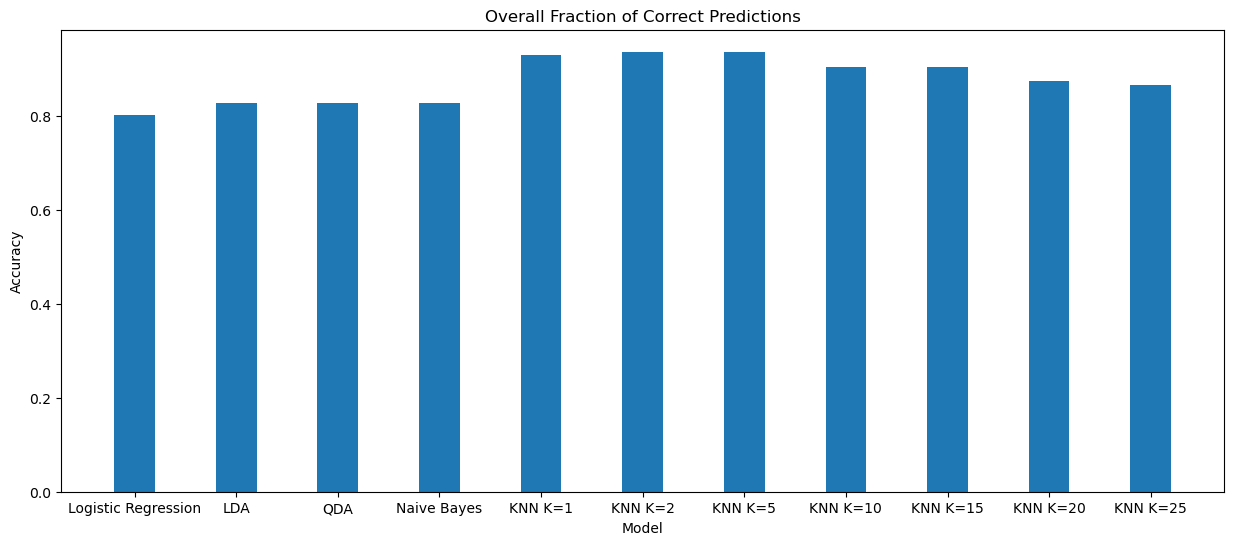

{'Logistic Regression': 0.8031496062992126, 'LDA': 0.8267716535433071, 'QDA': 0.8267716535433071, 'Naive Bayes': 0.8267716535433071, 'KNN K=1': 0.9291338582677166, 'KNN K=2': 0.937007874015748, 'KNN K=5': 0.937007874015748, 'KNN K=10': 0.905511811023622, 'KNN K=15': 0.905511811023622, 'KNN K=20': 0.8740157480314961, 'KNN K=25': 0.8661417322834646}

 Max: (0.937007874015748, 'KNN K=5') 

 Truth       0   1
Predicted        
0          57  17
1           8  45


In [97]:
compareModels(X_train[vars], X_test[vars], np.ravel(y_train), np.ravel(y_test))

### Best results using KNN, K = 1 with nox and rad